# Playstore Analysis Project

### Objective
Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.
The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations.

## Importing Libraries

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt

In [205]:
df = pd.read_csv("playstore-analysis.csv")

## Tasks

### 1. Data clean up – Missing value treatment

In [206]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [207]:
df.shape

(10841, 13)

In [208]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### a. Drop records where rating is missing since rating is our target/study variable


In [209]:
df.dropna(subset=['Rating'], inplace=True)

In [210]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Removed rows where rating is missing. Used `dropna()` function here.

#### b. Check the null values for the Android Ver column. 

#### i. Are all 3 records having the same problem?

In [211]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [212]:
df['Android Ver'].isnull().sum()

3

In [213]:
df[df['Android Ver'].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [214]:
df.drop(index = [10472], inplace = True)

In [215]:
df[df['Android Ver'].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [216]:
df['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [217]:
df['Android Ver'].describe()

count           9364
unique            31
top       4.1 and up
freq            2059
Name: Android Ver, dtype: object

In [218]:
# Replacing the NaN values of Android Ver columns with its mode
df['Android Ver'].fillna('4.1 and up', inplace= True)

In [219]:
df[df['Android Ver'].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [220]:
df[(df['App'] == '[substratum] Vacuum: P') | (df['App'] == 'Pi Dark [substratum]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


##### Missing values of the Android Ver columns are replaced with its mode value successfully

#### c. Current ver – replace with most common value

In [221]:
df['Current Ver'].isnull().sum()

4

In [222]:
df[df['Current Ver'].isnull()==True] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [223]:
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [224]:
df['Current Ver'].fillna('Varies with device', inplace = True)

In [225]:
df['Current Ver'].loc[[15,1553,6322,7333]]

15      Varies with device
1553    Varies with device
6322    Varies with device
7333    Varies with device
Name: Current Ver, dtype: object

##### Current ver column's missing values have been replaced with its mode value

### 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?

In [226]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [227]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Ans (a): Reviews, Installs, Price variables should be numeric

#### b. Price variable – remove $ sign and convert to float

In [228]:
df['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [229]:
df['Price'] = df['Price'].str.replace('\$','',regex = True)

In [230]:
df['Price'].value_counts()

0         8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [231]:
df['Price'] = df['Price'].astype('float64')

In [232]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### `Price` column has been converted to float

#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [233]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [234]:
df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [235]:
df['Installs'] = df['Installs'].str.replace('[,+]','',regex=True)

In [236]:
df['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [237]:
df['Installs'] = df['Installs'].astype('int64')

In [238]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### `Installs` column has been converted to Int64 dtype

#### d. Convert all other identified columns to numeric

In [239]:
df['Reviews'].describe()

count     9366
unique    5992
top          2
freq        83
Name: Reviews, dtype: object

In [240]:
df['Reviews'].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [241]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [242]:
df['Reviews'].describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [243]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### All identified columns i.e Installs, Reviews and Rating are converted to numeric dtype

### 3. Sanity checks – check for the following and handle accordingly


#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
        i. Are there any such records? Drop if so

In [244]:
df.loc[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### There are no records in Rating column that are greater then 5


#### b. Reviews should not be more than installs as only those who installed can review the app.
        i. Are there any such records? Drop if so.

In [245]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


#### There are 7 records that have count of Reviews more than count of Installs

In [246]:
df.drop(df[df['Reviews']>df['Installs']].index, inplace=True)

In [247]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### These 7 records are now removed from the dataframe

### 4. Identify and handle outliers –

#### a. Price column
    i. Make suitable plot to identify outliers in price 

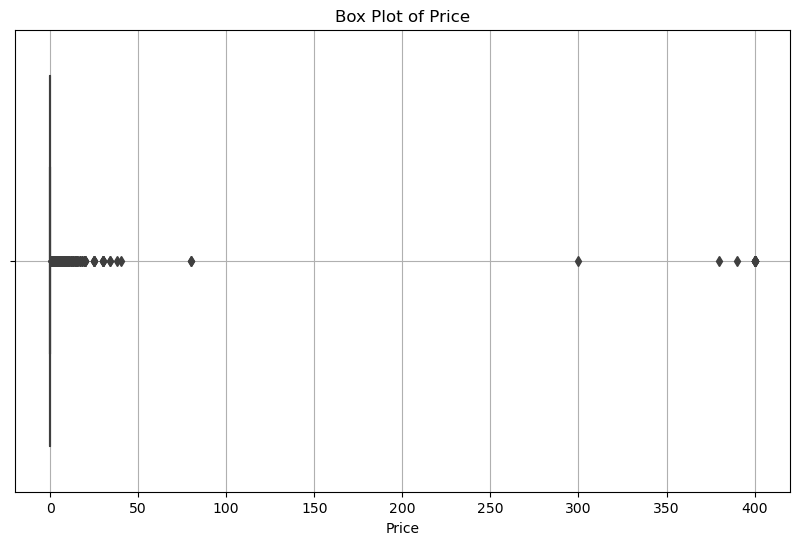

In [248]:
# Creating the box plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.grid(True)  # Optional: Adds a grid for better readability of the plot
plt.show()


In [249]:
lower_quartile = df['Price'].quantile(0.25)
upper_quartile = df['Price'].quantile(0.75)

print(f"Lower Quartile (25th percentile): {lower_quartile}")
print(f"Upper Quartile (75th percentile): {upper_quartile}")

Lower Quartile (25th percentile): 0.0
Upper Quartile (75th percentile): 0.0


In [250]:
df[df['Price'] > df['Price'].quantile(0.75)].shape

(644, 13)

#### a(ii). Do you expect apps on the play store to cost $200? Check out these cases

In [251]:
per_vg200 = round((df[df['Price'] >= 200].value_counts().sum()/df['Price'].value_counts().sum())*100,2)

per_vl200 = round((df[df['Price'] <= 200].value_counts().sum()/df['Price'].value_counts().sum())*100,2)

print("Percentage of Price value to ge greater than 200 = ", per_vg200,'%')
print("Percentage of Price value to ge less than 200 = ", per_vl200,'%')

Percentage of Price value to ge greater than 200 =  0.16 %
Percentage of Price value to ge less than 200 =  99.84 %


#### As we can see there are `99.84 %` values that are less than `$200` and `0.16 %` less than `$200`. Therefore, I don't expect apps on the play store to cost `$200`.

#### a(iii). After dropping the useless records, make the suitable plot again to identify outliers


In [252]:
df[df['Price'] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [253]:
df.drop(df[df['Price'] >= 200].index, inplace=True)

In [254]:
df[df['Price'] >= 200].shape

(0, 13)

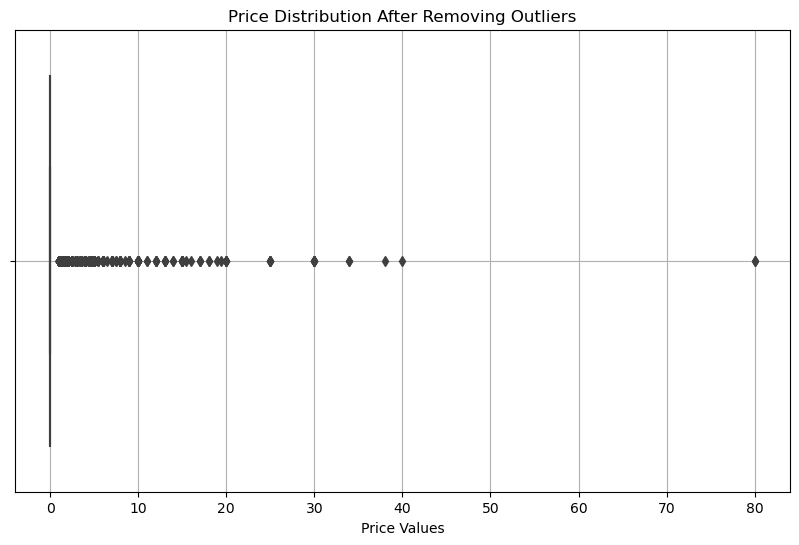

In [255]:
# Creating boxplot for the Price after removing outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Price Distribution After Removing Outliers')
plt.xlabel('Price Values')
plt.grid(True)  # Adds a grid for better readability of the plot
plt.show()


#### a(iv). Limit data to records with price < $30

In [256]:
df = df[df['Price']<30]

In [257]:
print(df[df['Price']<30].value_counts().sum())
print(df[df['Price']>30].value_counts().sum())


9338
0


#### Price records have been limited to `$30` successfully

#### b. Reviews column
        i. Make suitable plot

In [258]:
df['Reviews'].describe()

count    9.338000e+03
mean     5.155891e+05
std      3.148627e+06
min      1.000000e+00
25%      1.890000e+02
50%      6.011500e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

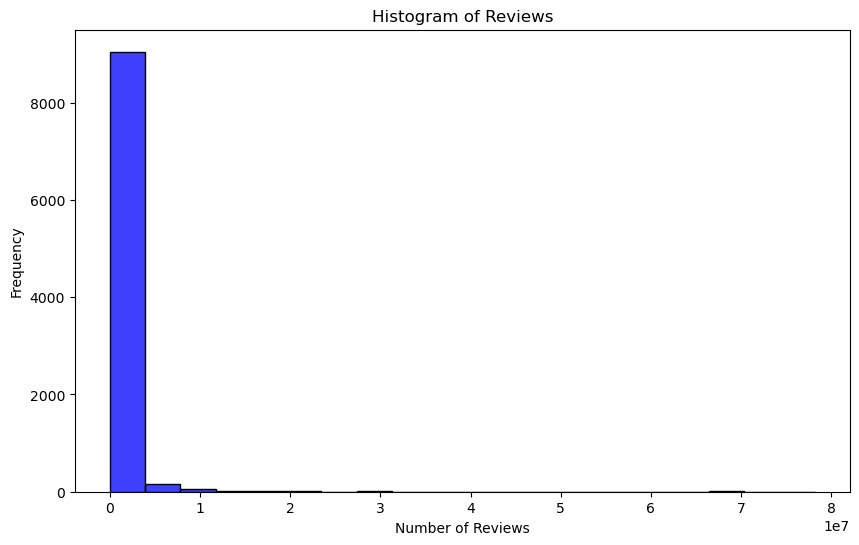

In [259]:
# Creating the histogram using seaborn for a better default styling
plt.figure(figsize=(10, 6))  # Set the size of the figure (optional)
sns.histplot(df['Reviews'], bins=20, kde=False, color='blue')  # You can adjust the number of bins
plt.title('Histogram of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


#### b(ii). Limit data to apps with < 1 Million reviews

In [260]:
R_dropped = df[df['Reviews']>1000000].value_counts().sum()

In [261]:
df['Reviews'].shape

(9338,)

In [262]:
df = df[df['Reviews']<1000000]
print(R_dropped,"rows are dropped")

704 rows are dropped


#### c. Installs


        i. What is the 95th percentile of the installs?

In [263]:
Inst_95 = df['Installs'].quantile(0.95)
print("The 95th percentile of the installs is",Inst_95)

The 95th percentile of the installs is 10000000.0


        ii. Drop records having a value more than the 95th percentile

In [264]:
drop_95 = df[df['Installs']>Inst_95].value_counts().sum()
df[df['Installs']>Inst_95]
print(drop_95,"rows are dropped")

199 rows are dropped


## Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#### a. How do you explain this?


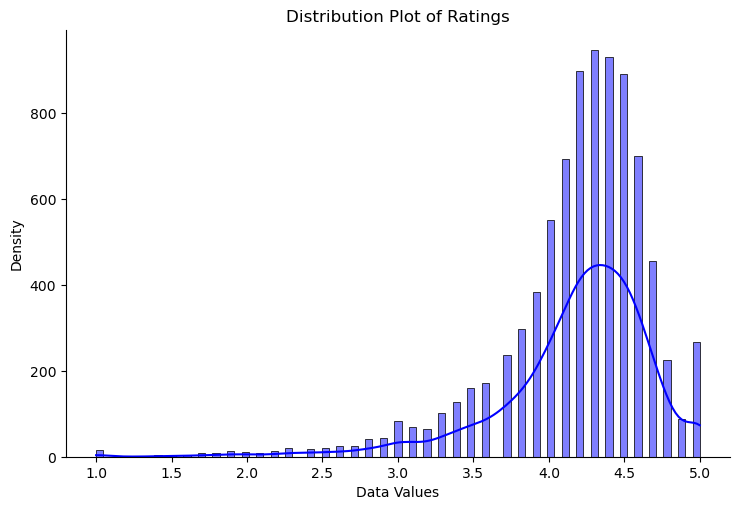

In [265]:
# Create a distribution plot
sns.displot(df['Rating'], kde=True, color='blue', height=5, aspect=1.5)
plt.title('Distribution Plot of Ratings')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.show()


In [266]:
print('The skewness of this distribution is',df['Rating'].skew())

The skewness of this distribution is -1.7617009755273947


#### b. What is the implication of this on your analysis?

In [267]:
R_mean = df['Rating'].mean()
R_median = df['Rating'].median()
R_mode = df['Rating'].mode().tolist()
print(R_mean)
print(R_median)
print((R_mode))

4.172492471623822
4.3
[4.3]


In [268]:
print("The mode:{}>= median:{}> mean:{}.Therefore, this distribution is Left-Skewed Distribution(Negatively Skewed)".format(R_mode,R_median,R_mean))

The mode:[4.3]>= median:4.3> mean:4.172492471623822.Therefore, this distribution is Left-Skewed Distribution(Negatively Skewed)


### 6. What are the top Content Rating values?


    a. Are there any values with very few records?
    b. If yes, drop those as they won’t help in the analysis


In [269]:
df['Content Rating'].value_counts()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

'Unrated' and 'Adults only 18+' are the two values with very few records (1 and 3 records respectively).  

Therefore, they need to be dropped.

In [270]:
# creating a variable to store the number of the dropped records
CR_drop = df[(df['Content Rating']=='Unrated')| (df['Content Rating']=='Adults only 18+')].value_counts().sum()
df[(df['Content Rating']=='Unrated')| (df['Content Rating']=='Adults only 18+')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [271]:
df.drop(index=[298,3043,6424,8266], inplace=True)
print(CR_drop,"records are dropped")

4 records are dropped


### 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating

<Figure size 1000x500 with 0 Axes>

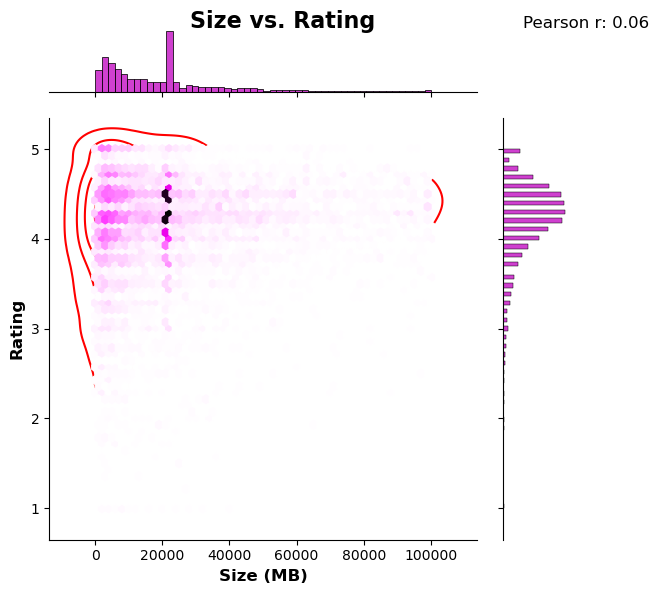

In [272]:
correlation = df['Size'].corr(df['Rating'])

# Create a joint plot
plt.figure(figsize=(10, 5))  # Set the figure size
jp = sns.jointplot(x='Size', y='Rating', data=df, kind='hex', color='m', space=0.4)

# Enhancements for aesthetics
jp.plot_joint(sns.kdeplot, color='r', zorder=0, levels=6)  # Add density contour for better visualization
jp.fig.suptitle('Size vs. Rating', fontsize=16, fontweight='bold')  # Title
jp.fig.subplots_adjust(top=0.95)  # To adjust the title to fit in fig area
jp.set_axis_labels('Size (MB)', 'Rating', fontsize=12, fontweight='bold')  # Axis labels
# Using plt.text to add text over the plot. Adjust x, y, and fontsize as needed.
jp.fig.text(x=0.9, y=0.95, s=f'Pearson r: {correlation:.2f}', fontsize=12)
# Show the plot
plt.show()


#### b. Do you see any patterns?

Yes, a pattern can be observed between the two variables. There is a week correation between Size and Rating

#### c. How do you explain the pattern?

* As we can see by the Contours, there is a high desity change between Rating in range [3.8 approx. to 4.8 approx.] and Size in range [0 to 20000 approx.]. This indicates that the likelihood of finding a data point within this area is high.

* The Pearson coefficient value is `0.06`; it is very close to 0, which implies that there is a negligible linear correlation between the variables. 
* The values in the Size and the Rating columns have a positive relationship. This means that as Size variable increases, the Rating variable tends to increase as well, albeit very slightly in this case.

### 8. Effect of price on rating

#### a. Make a jointplot (with regression line)


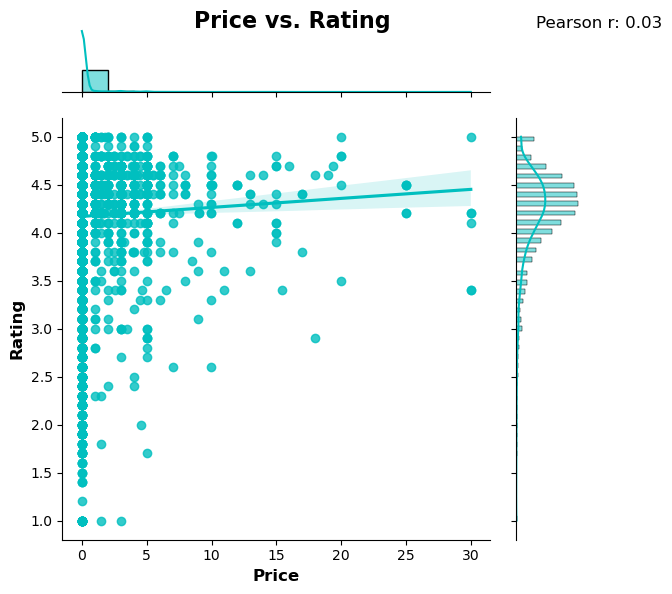

In [273]:
correlation = df['Price'].corr(df['Rating'])

# Create a joint plot with a regression line
jp = sns.jointplot(x=df['Price'], y=df['Rating'], data=df, kind='reg', color='c', space=0.4)

# Enhancements for aesthetics
jp.fig.suptitle('Price vs. Rating ', fontsize=16, fontweight='bold')  # Add a title
jp.fig.subplots_adjust(top=0.95)  # Adjust the title to fit within the figure area
jp.set_axis_labels('Price', 'Rating', fontsize=12, fontweight='bold')  # Set axis labels
jp.fig.text(x=0.9, y=0.95, s=f'Pearson r: {correlation:.2f}', fontsize=12)

# Display the plot
plt.show()


####  b. What pattern do you see?

As the Price increases the Rating tend to increases but slightly

#### c. How do you explain the pattern?

* The coefficient of correlation is 0.03.
* This indicates that as Price values increases, the Rating values slightly increases. But this change is not that significant as the coeff. value is closer to 0.

#### d. Replot the data, this time with only records with price > 0 

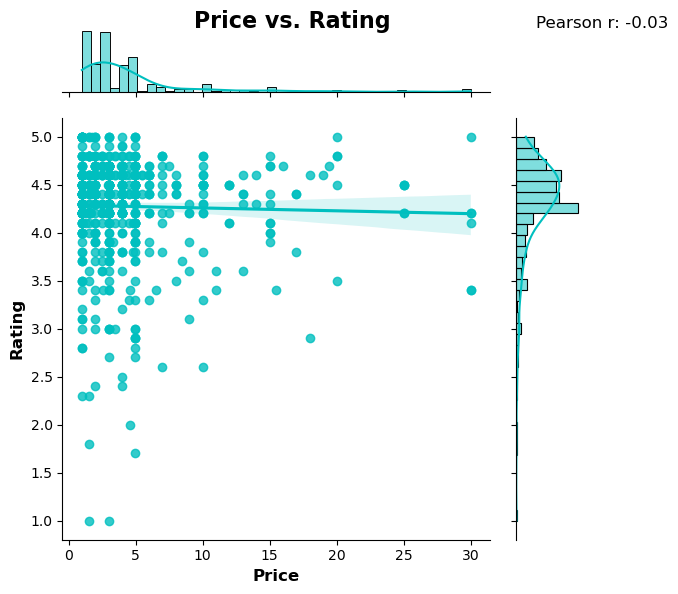

In [274]:
# Filtering the Price data
PR = df[df['Price']>0]

correlation = PR['Price'].corr(PR['Rating'])

# Create a joint plot with a regression line
jp = sns.jointplot(x=PR['Price'], y=PR['Rating'], data=df, kind='reg', color='c', space=0.4)

# Enhancements for aesthetics
jp.fig.suptitle('Price vs. Rating ', fontsize=16, fontweight='bold')  # Add a title
jp.fig.subplots_adjust(top=0.95)  # Adjust the title to fit within the figure area
jp.set_axis_labels('Price', 'Rating', fontsize=12, fontweight='bold')  # Set axis labels
jp.fig.text(x=0.9, y=0.95, s=f'Pearson r: {correlation:.2f}', fontsize=12)

# Display the plot
plt.show()


#### e. Does the pattern change?

Yes, after filtering the dataset for price values greater than 0, there is a significant change in the correlation between price and rating.

* The coefficient of correlation before and after applying the filter is 0.03 and -0.03 respectively.
* This indicates that as Price values increases, the Rating values slightly decreases.

#### f. What is your overall inference on the effect of price on the rating

There is no significant effect of price on rating. We can see that values of rating above 4.5 are almost constant even if the price value changes.

### 9. Look at all the numeric interactions together –

#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

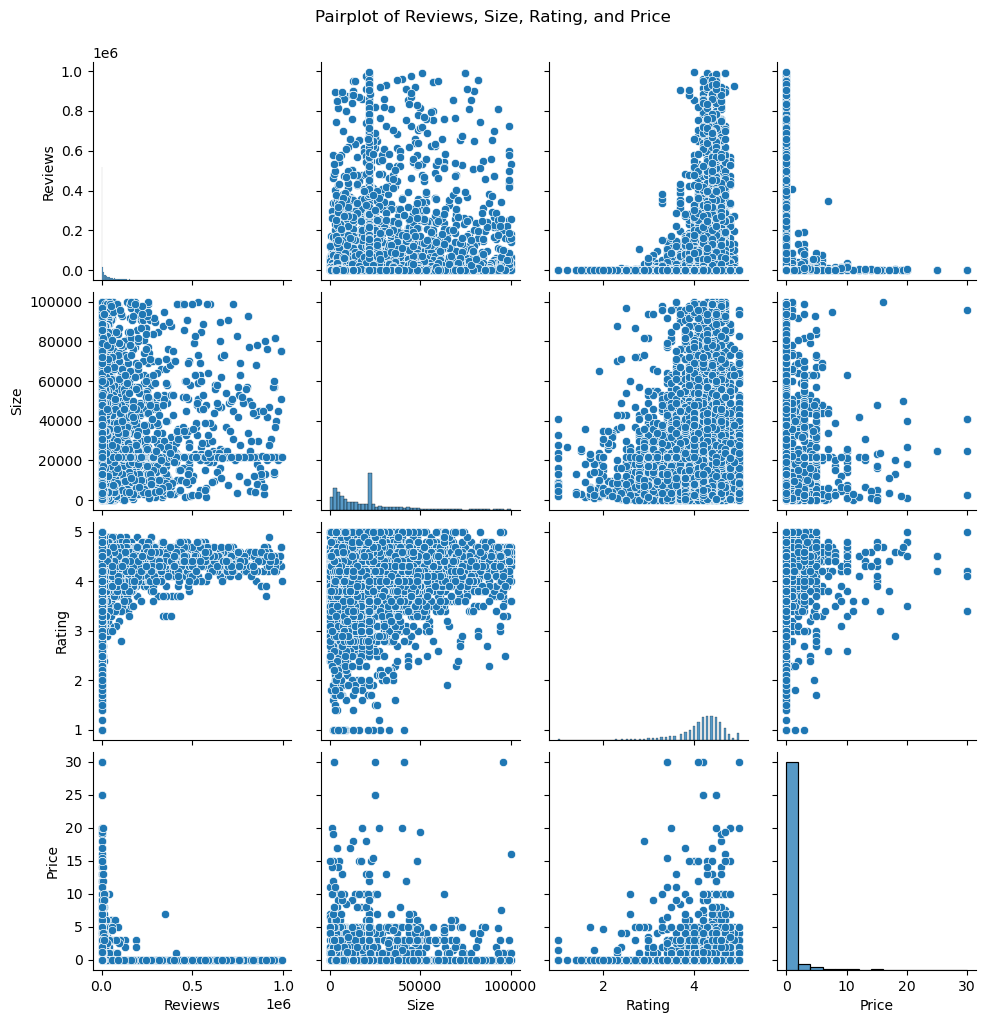

In [275]:
# Creating a pairplot for selected columns
pair_plot = sns.pairplot(df[['Reviews', 'Size', 'Rating', 'Price']])
pair_plot.fig.suptitle('Pairplot of Reviews, Size, Rating, and Price', y=1.02) 

# Display the plot
plt.show()


### 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

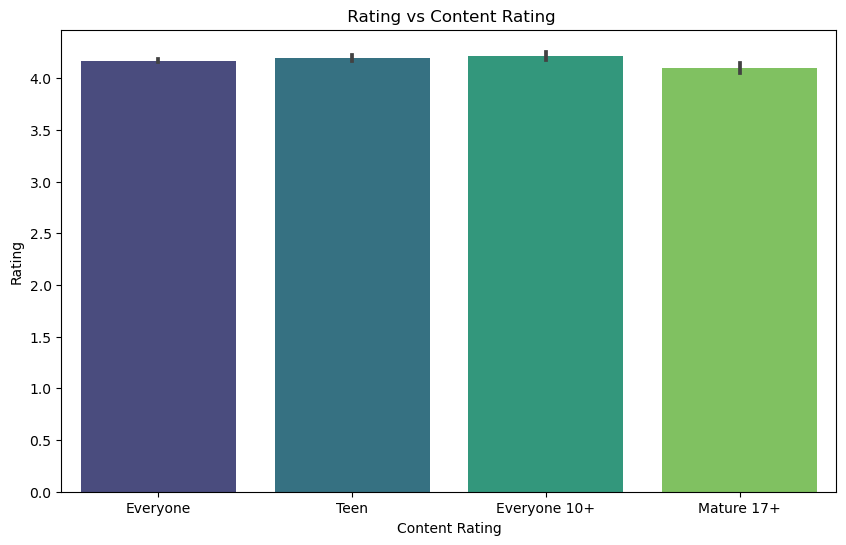

In [276]:
# Create a bar plot
plt.figure(figsize=(10, 6))  
sns.barplot(x='Content Rating', y='Rating', data=df, palette='viridis')

# Add titles and labels
plt.title(' Rating vs Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')

# Show the plot
plt.show()


#### b. Which metric would you use? Mean? Median? Some other quantile?

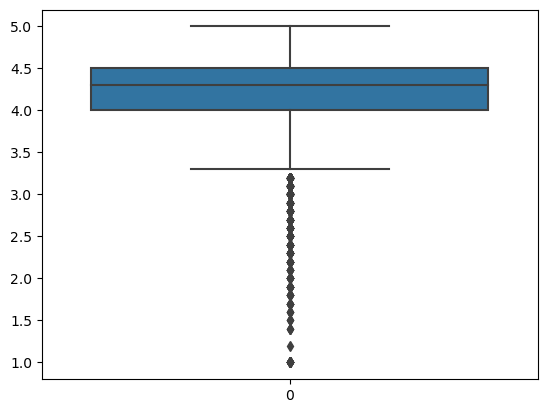

In [277]:
# Seeing if the Rating column have any outliers
sns.boxplot(data= df['Rating'])
plt.show()

* Rating has large number of outliers therefore, I will choose median as a metric for the measures of central tendency.
* The median is a robust measure of central tendency that is not affected by outliers. that is why I am using it as a metric.

#### c. Choose the right metric and plot

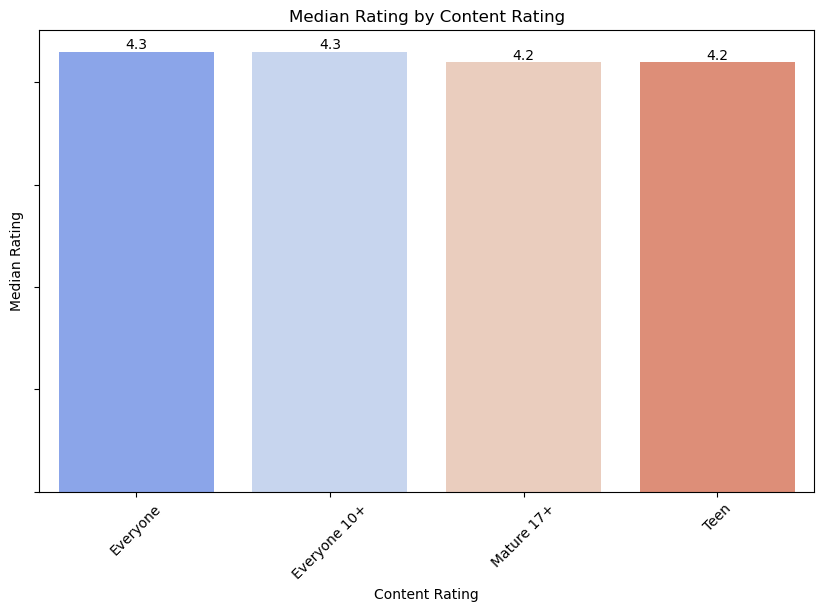

In [278]:
# Calculating the median 
median_ratings = df.groupby('Content Rating')['Rating'].median().reset_index()
plt.figure(figsize=(10, 6))  # Set the figure size
BPlt = sns.barplot(x='Content Rating', y='Rating', data=median_ratings, palette='coolwarm')
plt.title('Median Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Median Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_yticklabels([])  # Hide Y-axis tick labels
for bar in BPlt.patches:
    # Using plt.text to add text over each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate position of the text
        bar.get_height(),  # y-coordinate position of the text
        f'{bar.get_height():.1f}',  # text to be displayed
        ha='center',  # center alignment
        va='bottom',  # bottom alignment ensures text is just above the bar
        fontsize=10,  # font size
        color='black'  # text color
    )
    
plt.show()


### 11. Content rating vs. size vs. rating – 3 variables at a time
b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination
c. Make a heatmap of this
i. Annotated
ii. Greens color map
d. What’s your inference? Are lighter apps preferred in all categories? Heavier? 
Some?

#### a. Create 5 buckets (20% records in each) based on Size

In [279]:
# To create 5 buckects each containg 20% of records in each we can use qcut() function.

size_buckets = pd.qcut(df['Size'], q=5, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

# Add the size buckets as a new column to the DataFrame
df['Size Bucket'] = size_buckets

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,40k-60k
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,40k-60k
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,20k-40k
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,60k-80k
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0-20k


In [280]:
pd.pivot_table(df, values='Rating', index='Size Bucket', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size Bucket,,,,
0-20k,4.117536,4.189474,3.978947,4.184848
20k-40k,4.158405,4.207407,4.124211,4.233094
40k-60k,4.215699,4.238318,4.021705,4.138408
60k-80k,4.170799,4.193443,4.155172,4.198131
80k-100k,4.187396,4.217073,4.193814,4.246154


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [281]:
# Calculate the 20th percentile of 'Rating' 
results = df.groupby(['Content Rating', 'Size Bucket'])['Rating'].apply(lambda x: x.quantile(0.2)).reset_index(name='20th Percentile Rating')
results

,Content Rating,Size Bucket,20th Percentile Rating
0,Everyone,0-20k,3.80
1,Everyone,20k-40k,3.80
2,Everyone,40k-60k,4.00
3,Everyone,60k-80k,3.80
4,Everyone,80k-100k,3.90
5,Everyone 10+,0-20k,3.86
6,Everyone 10+,20k-40k,3.92
7,Everyone 10+,40k-60k,4.10
8,Everyone 10+,60k-80k,4.00
9,Everyone 10+,80k-100k,4.00


In [282]:
pt = pd.DataFrame(results.pivot_table(index='Content Rating', columns='Size Bucket', values='20th Percentile Rating', fill_value='-'))
pt

Size Bucket,0-20k,20k-40k,40k-60k,60k-80k,80k-100k
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


#### c. Make a heatmap of this
* i. Annotated
* ii. Greens color map


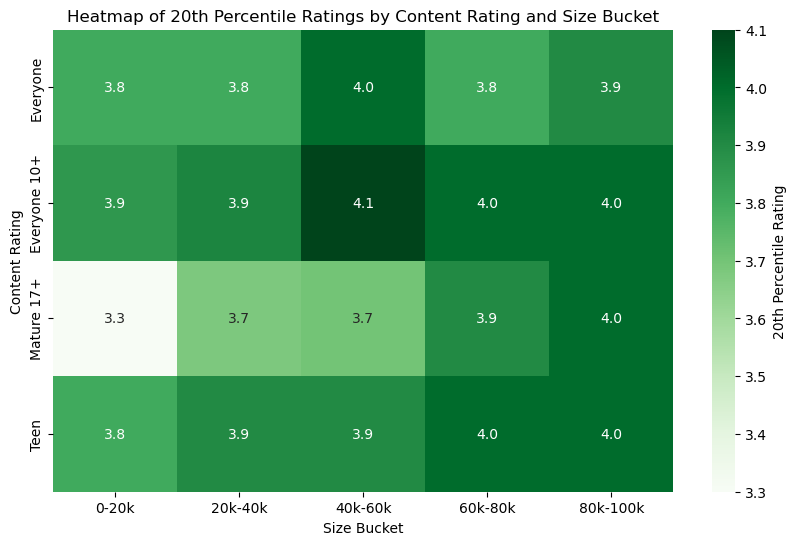

In [283]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pt, annot=True, fmt=".1f", cmap='Greens', cbar_kws={'label': '20th Percentile Rating'})
plt.title('Heatmap of 20th Percentile Ratings by Content Rating and Size Bucket')
plt.xlabel('Size Bucket')
plt.ylabel('Content Rating')
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

As per my analysis lightweight apps are not preferred in all categories but rather heavier apps are preferred. Apps with sizes of 40k-60k and 80k-100k received the greatest ratings across all categories. Overall, we can infer that bulkier apps are preferable in all areas.
